In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from cv_master import SatelliteImageData, Grid2DKernel

sns.set_style('whitegrid')

In [2]:
kernel = Grid2DKernel(60, 60)
data = SatelliteImageData(kernel)
df = data.df
df['log(sd)'] = np.log(df.sd)

col_names = [
    ('label', 'Expert Label'),
    ('ndai', 'NDAI'),
    ('sd', 'SD'),
    ('corr', 'CORR'),
    ('ra_df', 'Radiance angle DF'),
    ('ra_cf', 'Radiance angle CF'),
    ('ra_bf', 'Radiance angle BF'),
    ('ra_af', 'Radiance angle AF'),
    ('ra_an', 'Radiance angle AN'),
]

In [31]:
def wrap_index(i, ncol):
    return i//ncol, i%ncol

def get_heatmap_data(df, col):
    return df[['y', 'x', col]].set_index(['y', 'x']).unstack()

def plot_heatmap(data, label, cmap, ax):
    sns.heatmap(data, cmap=cmap, ax=ax)
    ax.axis("off")
    ax.set_title(label)

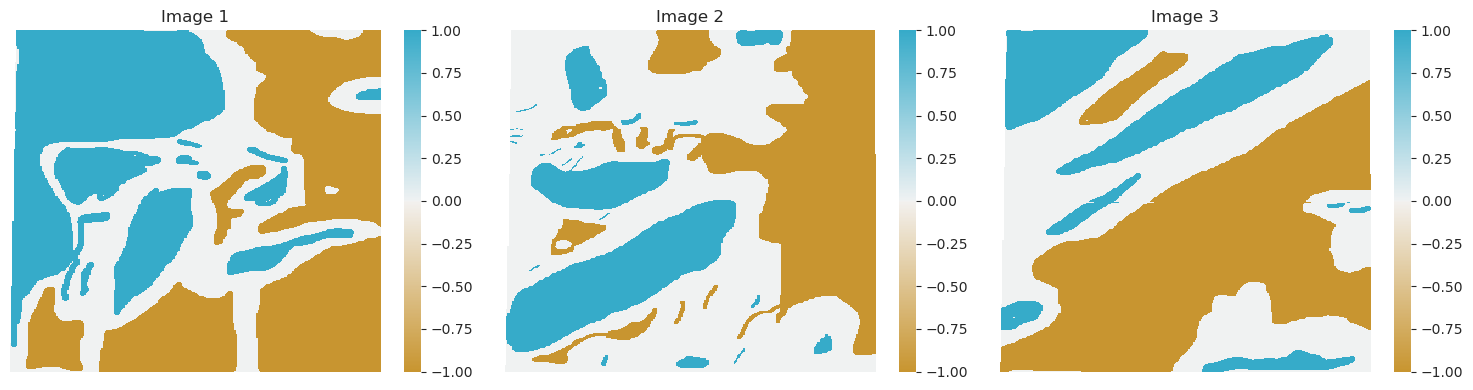

In [29]:
fig, ax = plt.subplots(1, 3, figsize=(5*3, 4))

# universial divergent color map
cmap = sns.diverging_palette(55, 220, s=90, l=65, as_cmap=True)

for i in range(3):
    ax_i = ax[i]
    plot_heatmap(get_heatmap_data(df[df.image==i], 'label'), label=f'Image {i+1}', cmap=cmap, ax=ax_i)

fig.tight_layout()
fig.show()

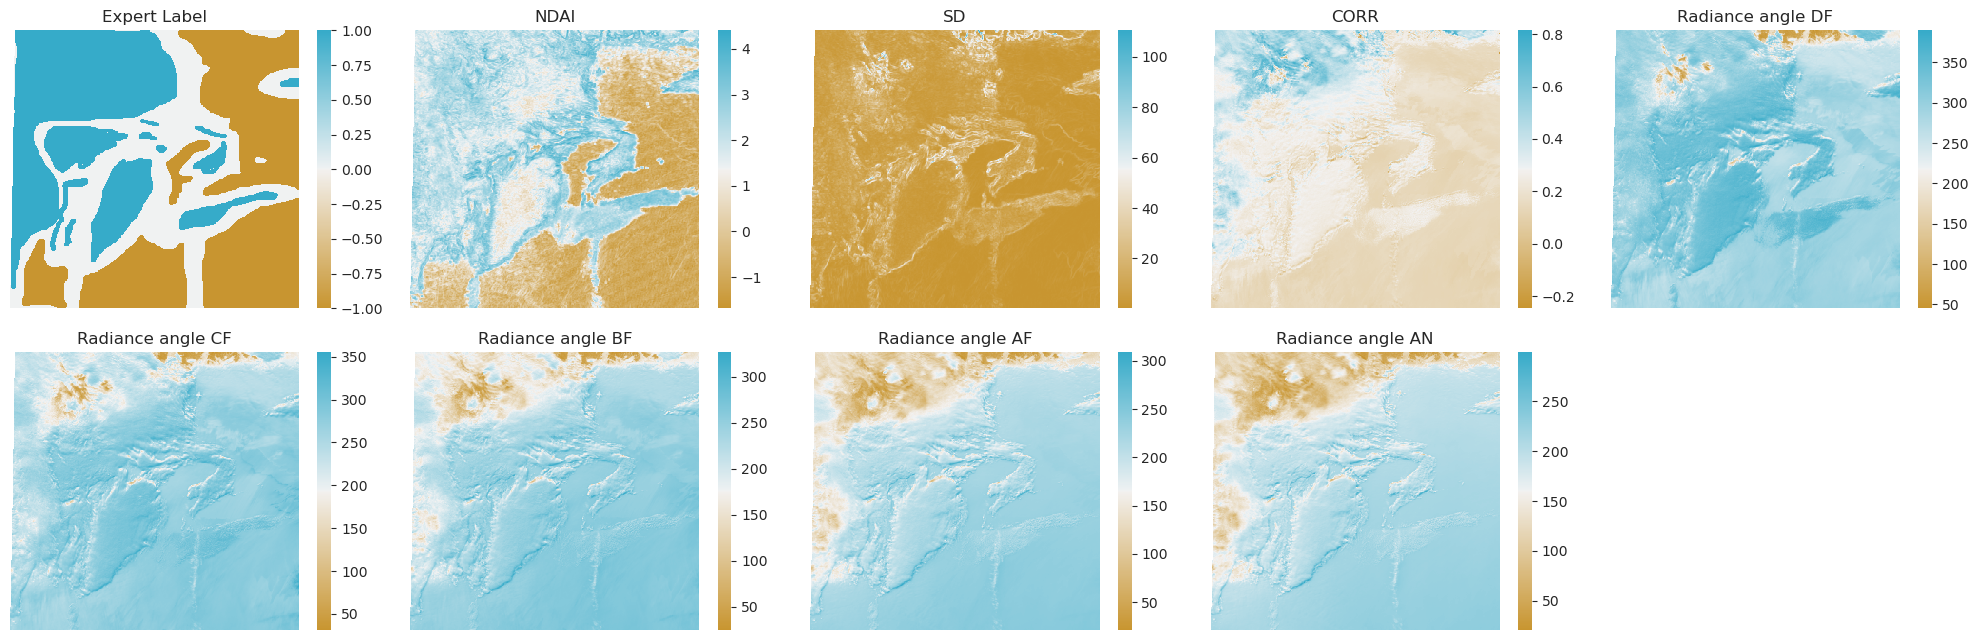

In [33]:
# universial divergent color map
# cmap = sns.diverging_palette(220, 20, as_cmap=True)
cmap = sns.diverging_palette(55, 220, s=90, l=65, as_cmap=True)

# setting up plot grid
nrow, ncol = 2, 5
fig, ax = plt.subplots(nrow, ncol, figsize=(4*ncol, 3.25*nrow))

# plotting each feature to its subplot
for i, (col, label) in enumerate(col_names):
    ax_ij = ax[wrap_index(i, ncol)]
    plot_heatmap(get_heatmap_data(df[df.image==0], col), label=label, cmap=cmap, ax=ax_ij)

# some clean up
fig.delaxes(ax[nrow-1, ncol-1])
fig.tight_layout()
fig.show()

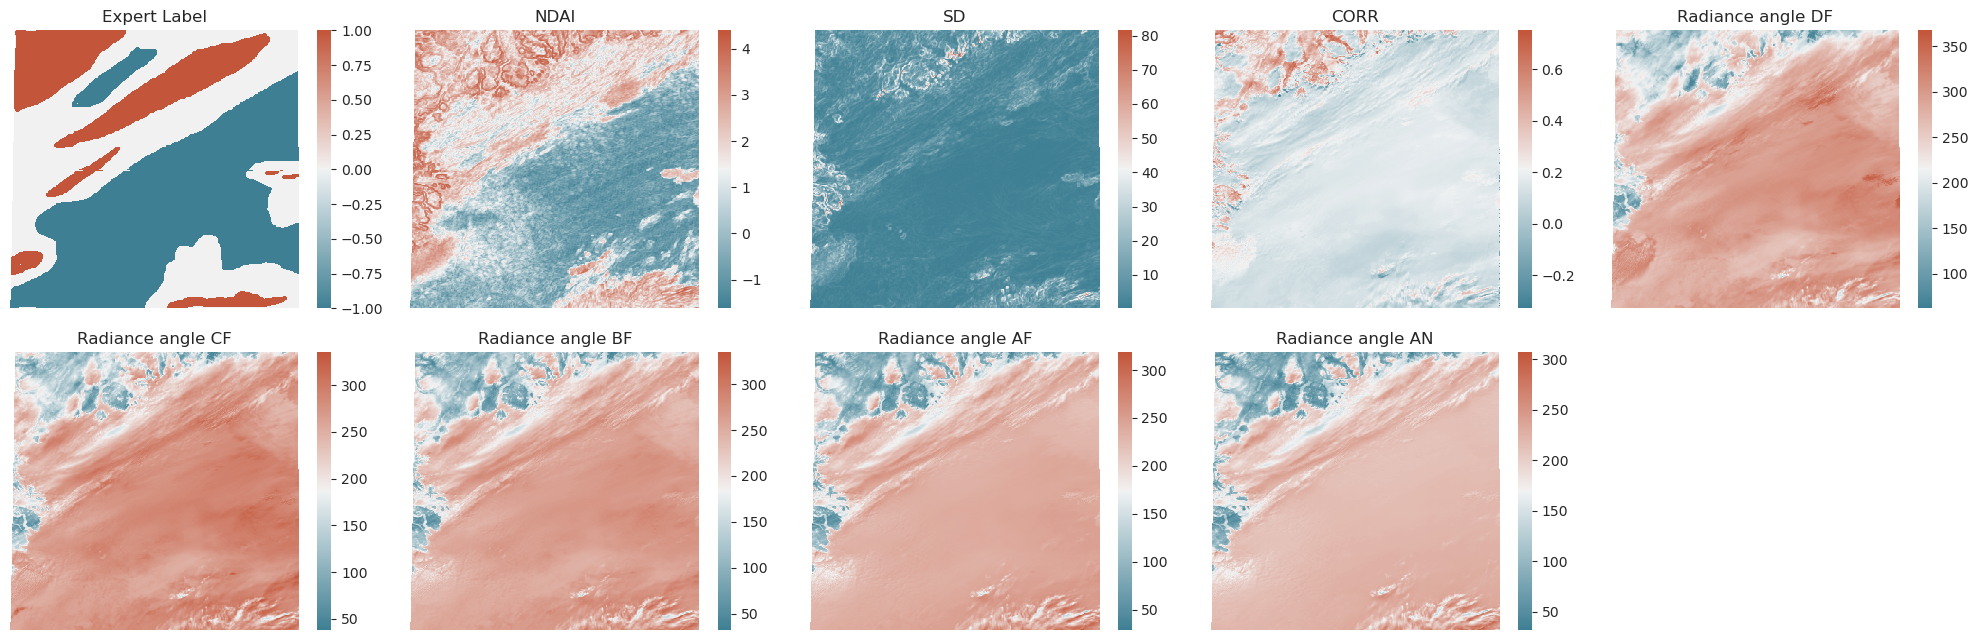

In [121]:
def wrap_index(i, ncol):
    return i//ncol, i%ncol

def get_heatmap_data(df, col):
    return df[['y', 'x', col]].set_index(['y', 'x']).unstack()

def plot_heatmap(data, label, cmap, ax):
    sns.heatmap(data, cmap=cmap, ax=ax)
    ax.axis("off")
    ax.set_title(label)

# universial divergent color map
cmap = sns.diverging_palette(220, 20, as_cmap=True)

# setting up plot grid
nrow, ncol = 2, 5
fig, ax = plt.subplots(nrow, ncol, figsize=(4*ncol, 3.25*nrow))

# plotting each feature to its subplot
for i, (col, label) in enumerate(col_names):
    ax_ij = ax[wrap_index(i, ncol)]
    plot_heatmap(get_heatmap_data(df, col), label=label, cmap=cmap, ax=ax_ij)

# some clean up
fig.delaxes(ax[nrow-1, ncol-1])
fig.tight_layout()
fig.show()

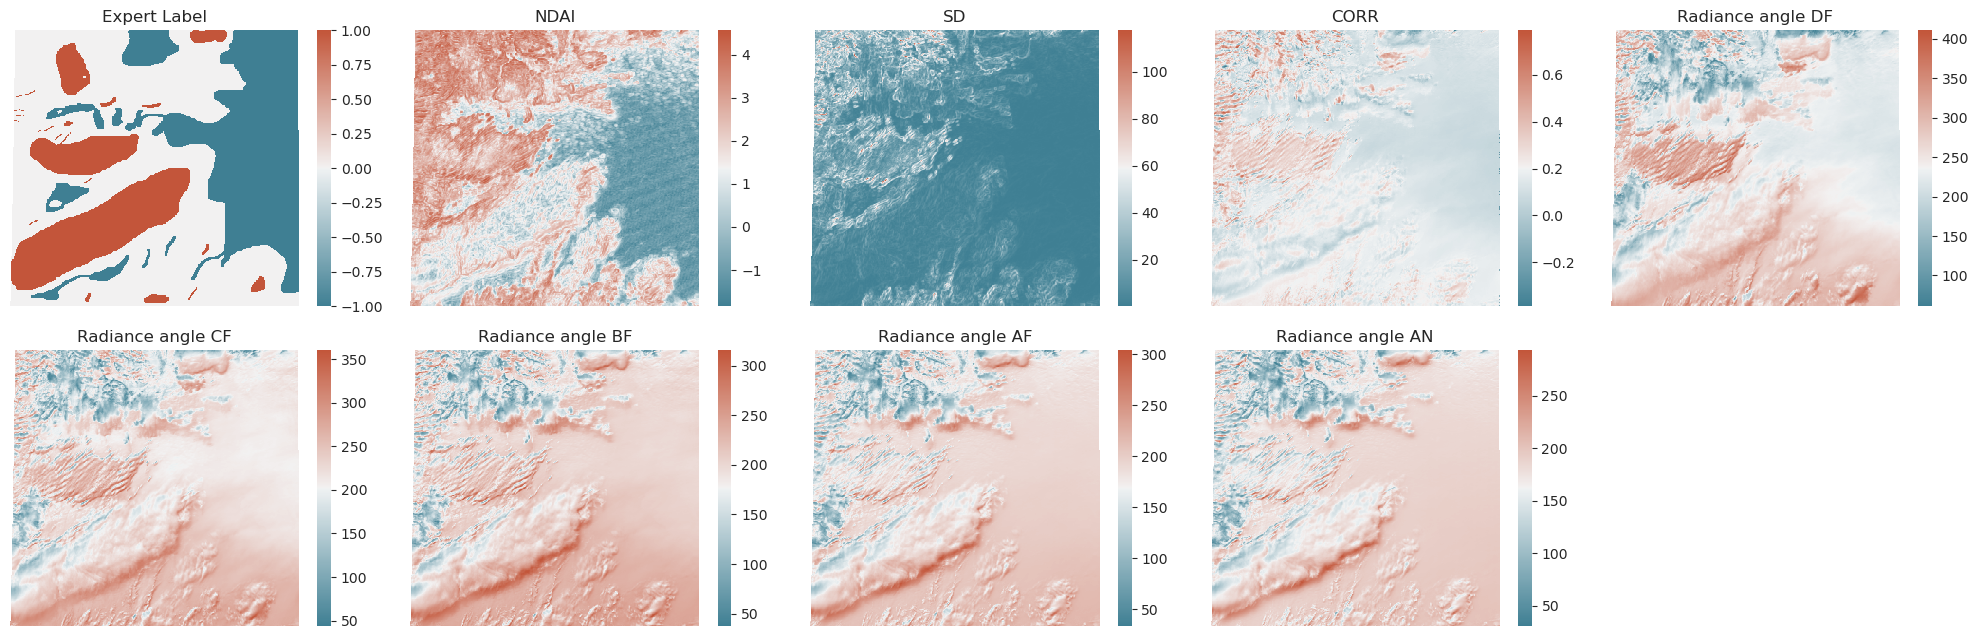

In [123]:
def wrap_index(i, ncol):
    return i//ncol, i%ncol

def get_heatmap_data(df, col):
    return df[['y', 'x', col]].set_index(['y', 'x']).unstack()

def plot_heatmap(data, label, cmap, ax):
    sns.heatmap(data, cmap=cmap, ax=ax)
    ax.axis("off")
    ax.set_title(label)

# universial divergent color map
cmap = sns.diverging_palette(220, 20, as_cmap=True)

# setting up plot grid
nrow, ncol = 2, 5
fig, ax = plt.subplots(nrow, ncol, figsize=(4*ncol, 3.25*nrow))

# plotting each feature to its subplot
for i, (col, label) in enumerate(col_names):
    ax_ij = ax[wrap_index(i, ncol)]
    plot_heatmap(get_heatmap_data(df, col), label=label, cmap=cmap, ax=ax_ij)

# some clean up
fig.delaxes(ax[nrow-1, ncol-1])
fig.tight_layout()
fig.show()

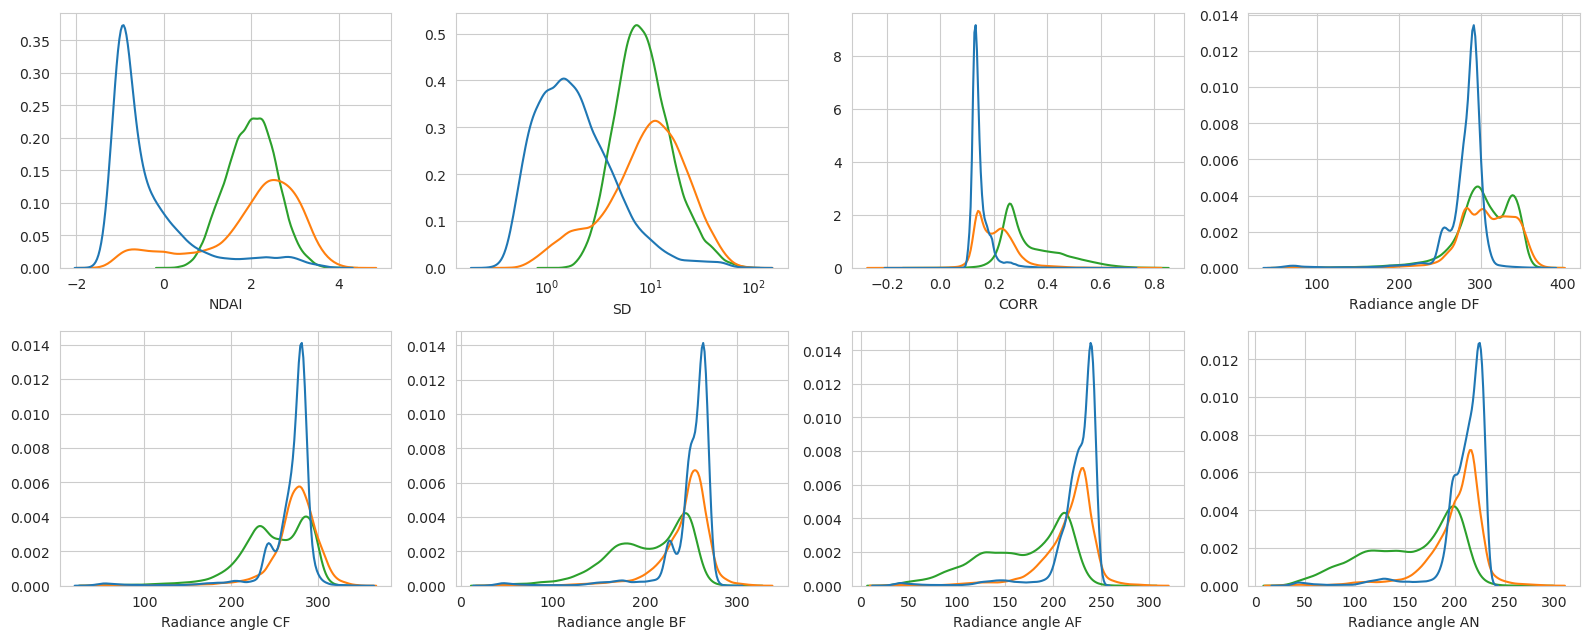

In [93]:
def plot_feature_by_label(df, feature, log_scale=False, ax=None):
    return sns.kdeplot(
        data=df, x=col, hue='label', log_scale=log_scale,
        palette=sns.color_palette("tab10", n_colors=3), hue_order=[-1,0,1], ax=ax
    )

# setting up plot grid
nrow, ncol = 2, 4
fig, ax = plt.subplots(nrow, ncol, figsize=(4*ncol, 3.25*nrow))

# plotting each feature to its subplot
for i, (col, label) in enumerate(col_names[1:]):
    ax_ij = ax[wrap_index(i, ncol)]
    if col == 'sd':
        plot_feature_by_label(df, col, log_scale=True, ax=ax_ij)
    else:
        plot_feature_by_label(df, col, log_scale=False, ax=ax_ij)

    ax_ij.set_xlabel(label)
    ax_ij.set_ylabel("")
    ax_ij.get_legend().remove()

fig.tight_layout()
fig.show()

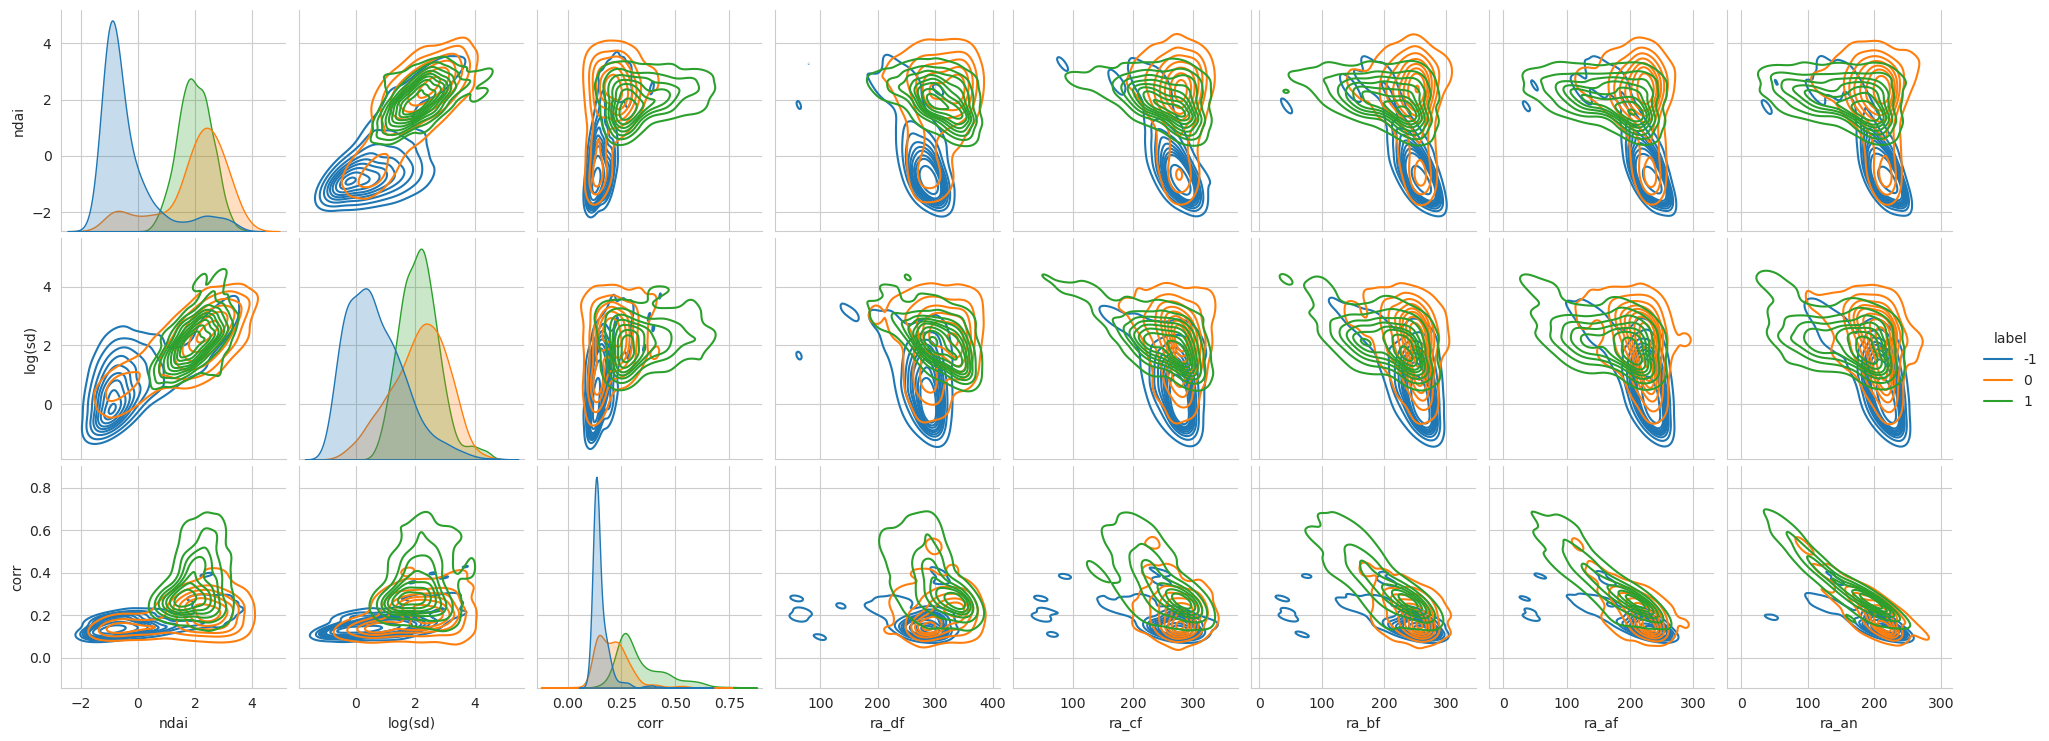

In [119]:

sns.pairplot(
    data=df.sample(2000),
    y_vars=['ndai', 'log(sd)', 'corr'],
    x_vars=['ndai', 'log(sd)', 'corr', 'ra_df', 'ra_cf', 'ra_bf', 'ra_af', 'ra_an'],
    kind='kde', hue='label',
    palette=sns.color_palette("tab10", n_colors=3), hue_order=[-1,0,1]
)